In [21]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# 📂 Load dataset
data = pd.read_csv("House Price India.csv")

# ✅ Use only top 10 important features (from feature importance plot)
top_features = [
    'living area',
    'grade of the house',
    'Lattitude',
    'Longitude',
    'living_area_renov',
    'Area of the house(excluding basement)',
    'waterfront present',
    'Built Year',
    'Postal Code',
    'number of views'
]

# 🎯 Target variable
target = 'Price'

# 🎲 Split the dataset
X = data[top_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📌 Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)

# 📌 Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)

# 📌 Train LightGBM
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_r2 = r2_score(y_test, lgbm_pred)

# 📊 Print R² scores
print(f"✅ Random Forest R²  : {rf_r2:.4f}")
print(f"✅ XGBoost R²        : {xgb_r2:.4f}")
print(f"✅ LightGBM R²       : {lgbm_r2:.4f}")

# 💾 Save all 3 models
# joblib.dump(rf_model, "random_forest_model.pkl")
# joblib.dump(lgbm_model, "lightgbm_model.pkl")

joblib.dump(xgb_model, "xgboost_model.pkl")
print("✅ Models saved as .pkl files")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 11696, number of used features: 10
[LightGBM] [Info] Start training from score 537783.716399
✅ Random Forest R²  : 0.8750
✅ XGBoost R²        : 0.8963
✅ LightGBM R²       : 0.8865
✅ Models saved as .pkl files


In [22]:
# Load model
model = joblib.load("xgboost_model.pkl")

# Input example
sample_input = pd.DataFrame([{
    'living area': 2240,
    'grade of the house': 9,
    'Lattitude': 52.9254,
    'Longitude': -114.482,
    'living_area_renov': 1570,
    'Area of the house(excluding basement)': 1550,
    'waterfront present': 0,
    'Built Year': 1923,
    'Postal Code': 122006,
    'number of views': 0
}])

# Predict
prediction = model.predict(sample_input)[0]
print(f"💰 Predicted Price: ₹{prediction:,.2f}")


💰 Predicted Price: ₹809,671.12


<h3>Visualizing Predictions</h3>

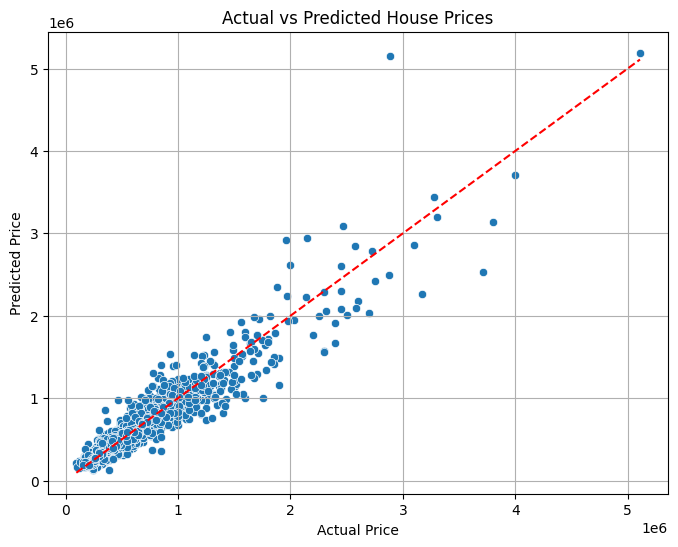

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()
